# Geovisualization II

## Choropleth Maps

A choropleth map uses different shading and colors based on quantitative data. They are one of the most common type of thematic maps used today. We have already seen one choropleth map in our example for mapping the EarthQuake data. 

Generally choropleth maps are used to represent continous variables such as rates and ratios. The map shown below is an example of choropleth map which shows the median household income across different states in United States for the year 2018

![mapping14](images/mapping14.jpg)

Now let's create our own choropleth maps.

As our first example we are going to create a choropleth map of Social Vulnerability Index for United States and then Ohio. So let us bring in the data.  (The details for each columns are given here https://svi.cdc.gov/Documents/Data/2018_SVI_Data/SVI2018Documentation.pdf)

In [1]:
import geopandas as gpd
import psycopg2
import numpy as np

In [2]:
conn = psycopg2.connect('dbname=nyc user=geospatial password=geospatial2023 host=ghhlibrary')

In [66]:
data = gpd.read_postgis(r'select fips,geom,rpl_themes,stcnty,st_abbr,EP_UNEMP,E_TOTPOP,location from us_tract_svi',conn)

E:\sbd2\lib\site-packages\geopandas\io\sql.py:154: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


In [67]:
data.loc[data.rpl_themes==-999.0,'rpl_themes'] = np.nan

In [68]:
data.loc[data.ep_unemp==-999.0,'ep_unemp'] = np.nan

In [69]:
data.loc[data.e_totpop==-999.0,'e_totpop'] = np.nan

In [5]:
data.head()

fips                                               geom  rpl_themes  \
0  01001020100  MULTIPOLYGON (((-86.50910 32.47349, -86.50577 ...      0.2823   
1  01001020200  MULTIPOLYGON (((-86.48093 32.48154, -86.47945 ...      0.5406   
2  01001020300  MULTIPOLYGON (((-86.47087 32.47573, -86.46964 ...      0.5042   
3  01001020400  MULTIPOLYGON (((-86.45394 32.49318, -86.45308 ...      0.2703   
4  01047957000  MULTIPOLYGON (((-87.47308 32.30761, -87.42174 ...      0.9221   

  stcnty st_abbr  ep_unemp  
0  01001      AL       2.1  
1  01001      AL       4.0  
2  01001      AL       2.7  
3  01001      AL       2.4  
4  01047      AL      21.4

Now let us create a choropleth map using the plot method with the column as rpl_themes (higher the rpl_theme, higher the vulnerability)

<AxesSubplot: >

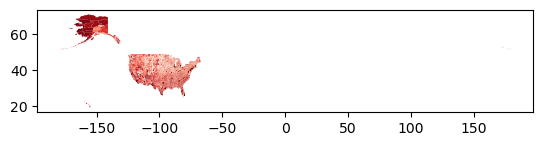

In [6]:
data.plot(column='rpl_themes', cmap='Reds')

Let us restrict our map to continental USA

(25.02, 49.28)

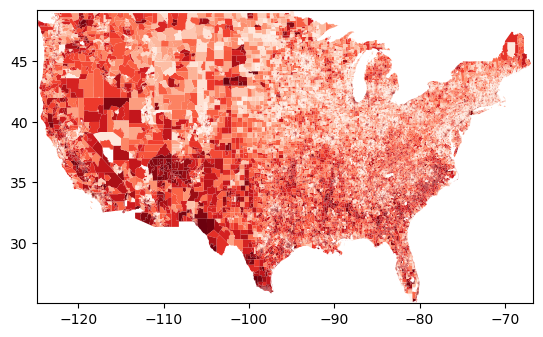

In [7]:
ax = data.plot(column='rpl_themes', cmap='Reds')
ax.set_xlim((-124.77,-66.67))
ax.set_ylim((25.02,49.28))

Let us change the color map to OrRd

(25.02, 49.28)

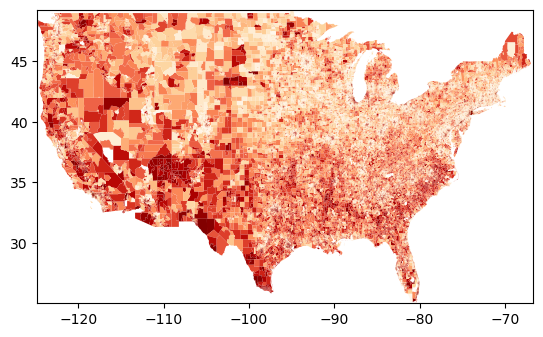

In [8]:
ax = data.plot(column='rpl_themes', cmap='OrRd')
ax.set_xlim((-124.77,-66.67))
ax.set_ylim((25.02,49.28))

Another color map RdYlGn

(25.02, 49.28)

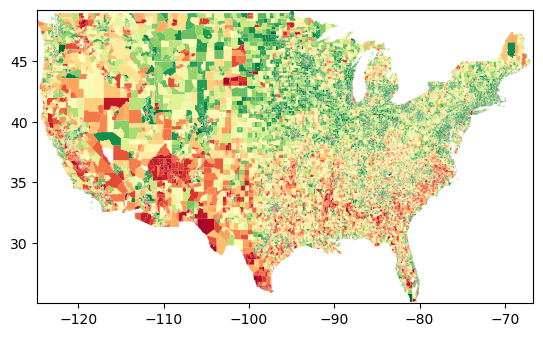

In [9]:
ax = data.plot(column='rpl_themes', cmap='RdYlGn_r')
ax.set_xlim((-124.77,-66.67))
ax.set_ylim((25.02,49.28))

Now let us add a legend

(25.02, 49.28)

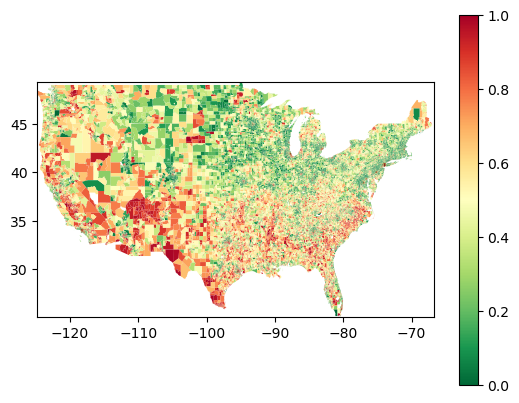

In [10]:
ax = data.plot(column='rpl_themes', cmap='RdYlGn_r',legend=True)
ax.set_xlim((-124.77,-66.67))
ax.set_ylim((25.02,49.28))

Now let us zoom in and plot SVI from census tracts with in Cuyahoga  (39035)

In [70]:
cuyahoga = data[data.stcnty=='39035']

In [71]:
cuyahoga

fips                                               geom  \
53955  39035101300  MULTIPOLYGON (((-81.76880 41.47691, -81.76877 ...   
54539  39035117500  MULTIPOLYGON (((-81.57544 41.55328, -81.57374 ...   
54592  39035118200  MULTIPOLYGON (((-81.61554 41.52957, -81.60937 ...   
54642  39035119402  MULTIPOLYGON (((-81.60290 41.48424, -81.59830 ...   
54816  39035124202  MULTIPOLYGON (((-81.81173 41.43384, -81.80847 ...   
...            ...                                                ...   
58693  39035980200  MULTIPOLYGON (((-81.75157 41.48715, -81.75104 ...   
58694  39035980500  MULTIPOLYGON (((-81.87891 41.39712, -81.87735 ...   
58695  39035980900  MULTIPOLYGON (((-81.57559 41.56671, -81.57541 ...   
58696  39035981000  MULTIPOLYGON (((-81.51701 41.45738, -81.49775 ...   
58697  39035981100  MULTIPOLYGON (((-81.84267 41.39783, -81.83685 ...   

       rpl_themes stcnty st_abbr  ep_unemp  e_totpop  \
53955      0.8187  39035      OH       4.6    1798.0   
54539      0.8029  39035      OH      21.4    2520.0   
54592      0.6814  39035      OH      15.3    2015.0   
54642      0.8137  39035      OH      11.5    1393.0   
54816      0.8128  39035      OH      10.3    1688.0   
...           ...    ...     ...       ...       ...   
58693         NaN  39035      OH       NaN       0.0   
58694         NaN  39035      OH       NaN       0.0   
58695         NaN  39035      OH       NaN       0.0   
58696         NaN  39035      OH       NaN       0.0   
58697         NaN  39035      OH       NaN       0.0   

                                          location  
53955     Census Tract 1013, Cuyahoga County, Ohio  
54539     Census Tract 1175, Cuyahoga County, Ohio  
54592     Census Tract 1182, Cuyahoga County, Ohio  
54642  Census Tract 1194.02, Cuyahoga County, Ohio  
54816  Census Tract 1242.02, Cuyahoga County, Ohio  
...                                            ...  
58693     Census Tract 9802, Cuyahoga County, Ohio  
58694     Census Tract 9805, Cuyahoga County, Ohio  
58695     Census Tract 9809, Cuyahoga County, Ohio  
58696     Census Tract 9810, Cuyahoga County, Ohio  
58697     Census Tract 9811, Cuyahoga County, Ohio  

[427 rows x 8 columns]

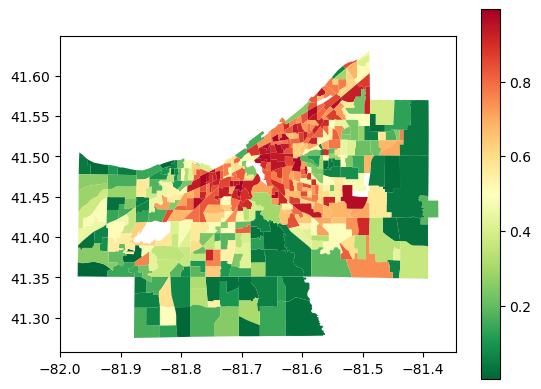

In [20]:
ax = cuyahoga.plot(column='rpl_themes', cmap='RdYlGn_r',legend=True)

If you want to create a choropleth map just for Ohio, can you give it a try.

Now before we get into the fancy interactive map, we need to understand classification schemes. 

### Classification Schemes

For this example let us map the Unemployment Rate estimate (EP_UNEMP) for Cuyahoga County.

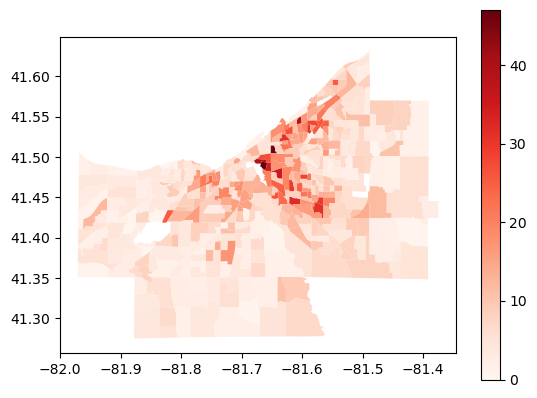

In [48]:
ax = cuyahoga.plot(column='ep_unemp', cmap='Reds',legend=True)

Now what if you want to create classfication intervals and then apply color based on the intervals. This is where classfication schemes comes into play.

#### Quantiles

**Quantiles** will place an **equal number of observations in each class**: For example if you have 30 tracts and 6 data classes, you’ll have 5 tracts in each class. The problem with quantiles is that you can end up with classes that have very different numerical ranges.

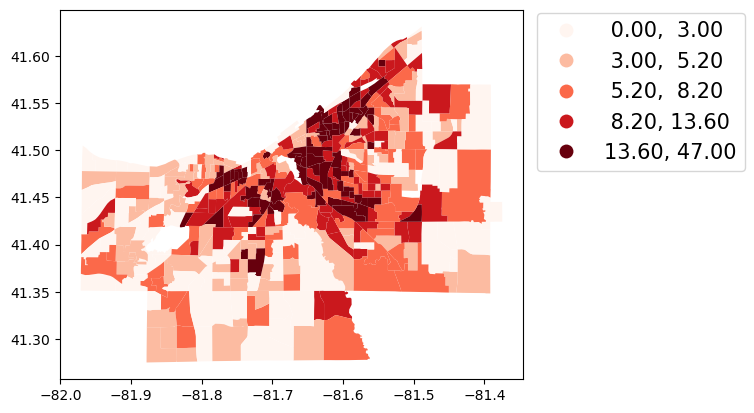

In [49]:
ax = cuyahoga.plot(column='ep_unemp', cmap='Reds',scheme='quantiles',k=5,legend=True,legend_kwds={'bbox_to_anchor':(1.5, 1.02),'fontsize':15})

As you can see the intervals are not uniform but you can easily see the similar distribution of tracts in each class interval

#### Equal Interval

Equal Interval **divides the data into equal size classes** (e.g., 0-10, 10-20, 20-30, etc.) and works best on data that is generally spread across the entire range. **Avoid equal interval if your data are skewed to one end or if you have one or two really large outlier values**. Outliers in that case will likely produce empty classes, wasting perfectly good classes with no observations in them.

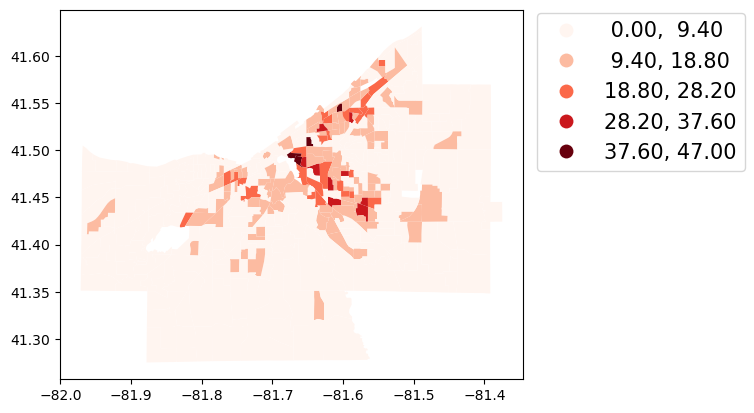

In [50]:
ax = cuyahoga.plot(column='ep_unemp', cmap='Reds',scheme='equal_interval',k=5,legend=True,legend_kwds={'bbox_to_anchor':(1.5, 1.02),'fontsize':15})

#### Natural Breaks

Natural Breaks is a kind of **"optimal" classification scheme that finds class breaks that (for a given number of classes) will minimize within-class variance and maximize between-class differences**. One drawback of this approach is **each dataset generates a unique classification solution**, and if you need to make comparison across maps, such as in an atlas or a series (e.g., one map each for 1980, 1990, 2000) you might want to use a single scheme that can be applied across all of the maps.

E:\sbd2\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


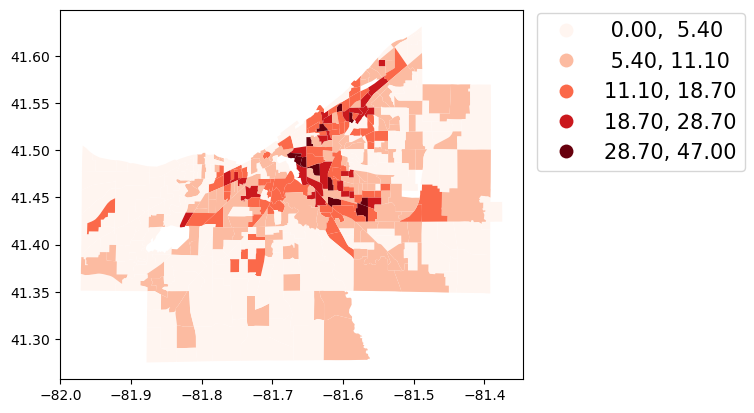

In [51]:
ax = cuyahoga.plot(column='ep_unemp', cmap='Reds',scheme='natural_breaks',k=5,legend=True,legend_kwds={'bbox_to_anchor':(1.5, 1.02),'fontsize':15})

#### Standard Deviation

Standard deviation is a **statistical technique type of map based on how much the data differs from the mean**. Initially the mean and standard deviation is calculated and each standard deviation is assigned as a class.

For this example we are going to use total population (e_totpop) as the variable of interest.

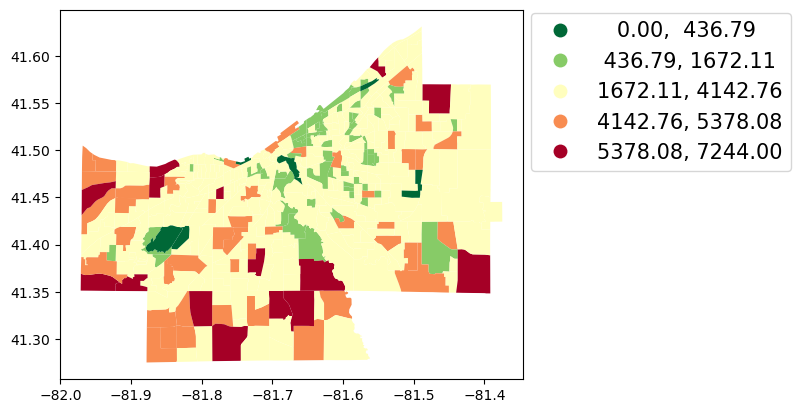

In [58]:
ax = cuyahoga.plot(column='e_totpop', cmap='RdYlGn_r',scheme='std_mean',k=5,legend=True,legend_kwds={'bbox_to_anchor':(1.6, 1.02),'fontsize':15})

#### Interactive Choropleth Maps

We can use the explore method in geodataframe to plot interactive Choropleth maps. Let us plot SVI for Cuyahoga County

In [72]:
cuyahoga.explore(column='rpl_themes', cmap='RdYlGn_r')

Let us reduce the opacity of the polygons for a better view

In [74]:
cuyahoga.explore(column='rpl_themes', cmap='RdYlGn_r',style_kwds={'fillOpacity':0.2})

You can create an interactive choropleth map using different classification schemes. Let us re-create the same map with quantile classification

In [76]:
cuyahoga.explore(column='rpl_themes', cmap='RdYlGn_r',k=5,scheme='quantiles')

or with equal interval

In [77]:
cuyahoga.explore(column='rpl_themes', cmap='RdYlGn_r',k=5,scheme='equal_interval')

#### Some Limitations of Choropleth Maps

1. **Sharp change in the boundaries between areas, which might be interpreted as an abrupt change in the variable value in that boundary**. This could hide **continuity of data**.

2. Another problem is the **homogeneity within each area**, which might lead to thinking that the **variable has a uniform distribution, even if that is false**.

3. Non-uniform areal unit and the problem of counts.

Based on the various zones aggregation various choropleth maps could be produced. 

![mapping22](images/mapping22.png)

4. Based on various ways of aggregation even the relationship between variables can change. This effect is sometimes called Modifiable Areal Unit Problem (MAUP)

Suppose there are two variables v1 and v2 with following distributions

![mapping23](images/mapping23.png)

As you can see, the two variables have almost no correlation (.001)

But if you aggregate the points to grids as shown below the correlation coefficient changes to (.03)

![mapping24](images/mapping24.png)

And if you aggregate the variables as shown below the correlation coefficient changes to (.75) indicating high correlation between the variables. 

![mapping25](images/mapping25.png)

The point is that, just by aggregating the variables at different spatial scales the underlying statistics changes. 

5. Ecological Fallacy. Failure in reasoning that arises when an inference is made about an individual based on aggregate data for a group. For example the per-capita income for this zip code is low, and hence anyone coming from this zip code is broke!!

6. The problem of small numbers. When the rates required for choropleth maps are carried out for small areas, they tend to be unstable. 